# IBM HR Data Analysis

## Introduction
#### Objective :
To predict if an employee is going to resign or not

#### Dataset :
Here, a dataset put up by IBM is used for analysis. The dataset contain 35 variables along with Attrition variable. It can be downloaded from the following link
Link - https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/

#### Approach :
1. Through the analysis it is intended to build a model which can predict if an employee is about to quit.
2. Considering all variables through some plots and infer about it in the exploratory analysis.
3. After the exploration, selection of some features is done based on the Variables at hand and take a call on inclusion/exclusion of few variables.

## Loading the data
Loaded the data and looked at the different Variables in the dataset

In [1]:
HRdata <- read.csv("HR-Employee-Attrition.csv")
names(HRdata)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"

## Splitting the Dataset into Training & Testing
In ordet to build a model we have to train on a set of observations, which we call the Training Set and then validate on the remaining set of observations, which we call our Testing Set.

So, we will perform all our analysis on the training set and validate it on our testing set. We shall divide our dataset into training(75%) and testing(25%)

In [2]:
library(caret)
library(ggplot2)


Loading required package: lattice
Loading required package: ggplot2


In [3]:
set.seed(12345)
inTrain <- createDataPartition(HRdata$Attrition,p=0.75,list = FALSE)
Training <- HRdata[inTrain,]
Testing <- HRdata[-inTrain,]

## Exploratory Analysis
Check the format of the fields which we have to play with in the Training Set.

In [4]:
str(Training)

'data.frame':	1103 obs. of  35 variables:
 $ Age                     : int  41 37 33 27 32 59 30 38 36 35 ...
 $ Attrition               : Factor w/ 2 levels "No","Yes": 2 2 1 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 3 2 3 2 3 3 2 3 3 ...
 $ DailyRate               : int  1102 1373 1392 591 1005 1324 1358 216 1299 809 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : int  1 2 3 2 2 3 24 23 27 16 ...
 $ Education               : int  2 2 4 1 2 3 1 3 3 3 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 5 2 4 2 4 2 2 4 4 ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 4 5 7 8 10 11 12 13 14 ...
 $ EnvironmentSatisfaction : int  2 4 4 1 4 3 4 4 3 1 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 1 2 2 1 2 2 2 2 ...
 $ HourlyRate              : int  94

In [5]:
prop.table(table(Training$Attrition)) #Percentage of Attrition


       No       Yes 
0.8386219 0.1613781 

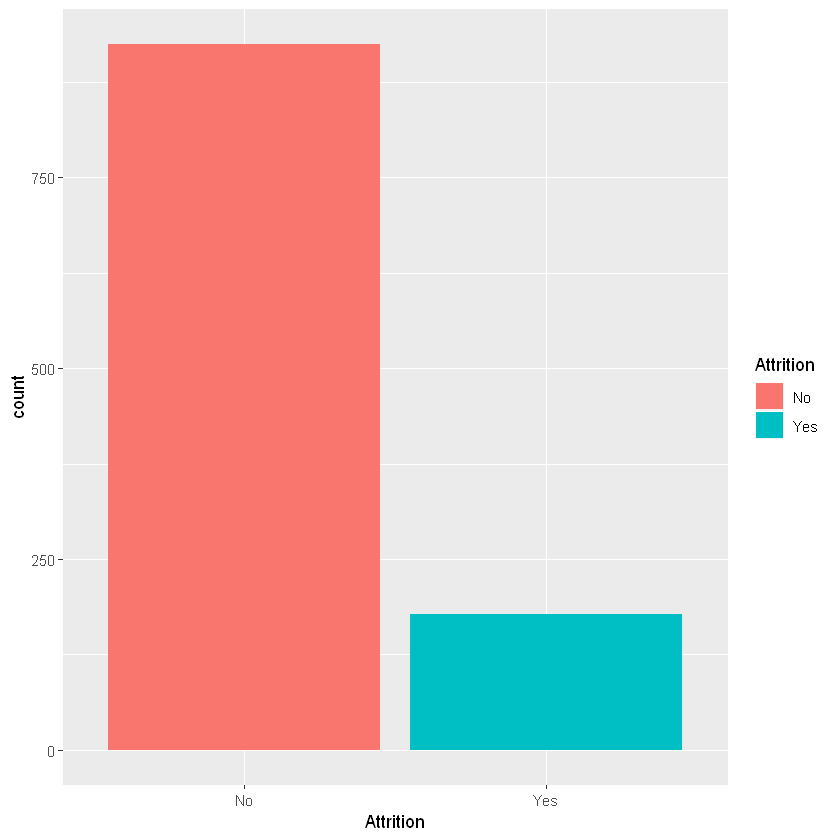

In [6]:
ggplot(Training,aes(Attrition,fill=Attrition))+geom_bar()